# IV.1. Primeros pasos con Pandas

En lecciones anteriores mencionamos que NumPy es un paquete esencial para ciencia de datos. No obstante, hay un paquete que utilizamos todavía más: Pandas.

La ironía es que Pandas utiliza NumPy por detrás de las cortinas, entonces, al utilizas Pandas también estamos utilizando NumPy. Muchas operaciones de las que aprendimos a hacer con NumPy las podremos hacer con Pandas también.


---

# El objeto *core*

Como vimos, el objeto *core* o principal de NumPy es el `ndarray`. Pandas tiene su propio (o propios) objetos principales: `Series` y `DataFrame`.

## Definiciones formales

`Series`: Es una estructura de datos unidimensional que puede contener datos de cualquier tipo (entero, flotante, cadena, etc.). Es similar a un arreglo unidimensional o a una columna en una tabla de base de datos. **Cada elemento en una Serie tiene un índice que lo identifica.**

`DataFrame`: Es una estructura de datos bidimensional que se organiza en filas y columnas, similar a una tabla de una base de datos o una hoja de cálculo de Excel. Cada columna en un DataFrame es una Serie, y las filas y columnas están etiquetadas con índices que permiten acceder y manipular los datos de manera eficiente.



> Una `Series` es esencialmente una columna, y un `DataFrame` es una tabla compuesta de una colección de `Series`.

 ![Objetos principales de Pandas](./img/pandas_1.png)

# Importar paquete de Pandas

Así como seguimos una convención para importar NumPy con el alias `np`, haremos algo similar con Pandas

In [4]:
import pandas as pd

# Creación de DataFrames

Hay más de una forma de crear un DataFrame, pero una opción rápida y sencilla es utilizando un diccionario para alimentar los datos.

> Esperamos que cada vez sea más evidente la importancia y necesidad de la clase de Análisis y Diseño de Algoritmos 😬

![fruit](./img/fruit.gif)

Supongamos que somos dueños de un puesto de frutas. Queremos tener una columna para cada fruta y una fila para cada venta que le hacemos a un cliente.

In [2]:
data = {
    'manzanas' : [3,2,0,1],
    'naranjas' : [0,3,1,2],
    'kiwis' :    [1,1,5,2]
}

Este diccionario lo vamos a usar para crear nuestro DataFrame. El método que crea el `DataFrame` a partir de un diccionario sabe que deberá tomar las **llaves** del diccionario como **columnas** y las **listas de valores** como las **filas**.

In [3]:
df = pd.DataFrame(data)
df

,manzanas,naranjas,kiwis
0,3,0,1
1,2,3,1
2,0,1,5
3,1,2,2


In [4]:
manzanas = df['manzanas']
manzanas

0    3
1    2
2    0
3    1
Name: manzanas, dtype: int64

También podemos acceder a una serie con la notación `dataframe.series`

In [5]:
df.naranjas

0    0
1    3
2    1
3    2
Name: naranjas, dtype: int64

Podemos convertir series a listas:

In [6]:
list(df.naranjas)

[0, 3, 1, 2]

---

# Análisis exploratorio de datos

 ![eda](./img/eda.gif)


Una de las tareas más comunes de ciencia de datos es el análisis exploratorio de datos, es aquí donde utilizamos herramientas como Pandas para investigar y comprender mejor nuestros datos, identificando patrones, tendencias, y relaciones, así como detectando valores atípicos y datos faltantes.

## Lectura de datos

Sin duda, la manera que más común de crear DataFrames en Pandas es leyendo una base de datos de un archivo externo.

En última lección de NumPy aprendimos a leer un archivo CSV a un ndarray, sin embargo, notamos algunas limitantes muy evidentes como el manejo de tipos de datos.


> Las series de Pandas son mucho más flexibles en este sentido


Pandas está hecho para trabajar con datos tabulares, o sea, datos que vengan en una estructura de filas y columnas. Y, por excelencia, el tipo de archivo que cuenta con esta estructura es el CSV.

## Nuestros datos

Descarguemos una base de datos de películas de IMDb de Kaggle. [Ésta es la liga](https://www.kaggle.com/PromptCloudHQ/imdb-data) a la base de datos. Kaggle es una excelente herramienta para encontrar bases de datos interesantes y aprender sobre ciencia de datos, inteligencia artificial, machine learning, etc.

Los datos ya están en la carpeta `data/` de este repositorio.

### Descripción de la base de datos

La base de datos contiene las mil películas más populares en IMDb. Las columnas de la base son:

* Title
* Genre
* Description
* Director
* Actors
* Year
* Runtime
* Rating
* Votes
* Revenue
* Metascrore


> Pero mejor veamos todos los detalles usando Pandas

## `read_csv`

Comencemos leyendo la base de datos con `read_csv()`

In [5]:
df = pd.read_csv('data/imdb.csv')

> Se utiliza el nombre de variable `df` para abreviar “DataFrame”. Es muy común que nombremos así a la variable que contiene nuestro conjunto de datos (DataFrame) en nuestros proyectos. Pero esto es completamente opcional.


Leimos el archivo sin ningún problema. Ahora lo primero que nos gustaría hacer es ver las primeras filas de nuestra tabla. Pandas nos permite inspeccionar las primeras 5 filas utlizando el método `head()`.

In [8]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


Si quisieramos ver más filas, podemos pasar un número entero al método `head()` y nos mostrará el número de filas que especifiquemos. 

In [10]:
df.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


O bien, podemos ver los **últimos** registros del DataFrame usando el método `tail`

In [11]:
df.tail(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


## Columnas

Podemos explorar las columnas de nuestro DataFrame muy fácilmente:

In [12]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [17]:
columnas = df.columns.tolist()

In [21]:
columnas[0]

'Rank'

De igual manera, podemos inspeccionar columna por columna con los métodos `head` o `tail`.

In [13]:
df["Rank"].head()

0    1
1    2
2    3
3    4
4    5
Name: Rank, dtype: int64

> ¡Atención!

**Es más fácil trabajar con nombres de columnas que no tengan espacios, por lo siguiente:**

Podemos acceder a los elementos de una columna específica a través de su nombre 

In [14]:
df.Rank.head()

0    1
1    2
2    3
3    4
4    5
Name: Rank, dtype: int64

Cuando el nombre de la columna con la que deseamos trabajar **no tiene espacio**, podemos usar la notación 

~~~
dataframe.columna
~~~


Pero si tiene espacio, tenemos que poner los valores entre comillas y corchetes. Intentemos hacerlo con la columna llamada `"Revenue (Millions)"`

In [15]:
df.Revenue (Millions)

AttributeError: 'DataFrame' object has no attribute 'Revenue'

Si el nombre de la columna tiene espaicios o caracteres especiales, debemos usar comillas. Específicamente, utilizamos la notación

```javascript
dataframe["nombre de la columna"]
```

O sea,

In [22]:
df['Revenue (Millions)'].head()

0    333.13
1    126.46
2    138.12
3    270.32
4    325.02
Name: Revenue (Millions), dtype: float64

---

Muchas veces, lo primero que hacemos es limpiar los nombres de nuestras columnas para que sea más fácil escribir código. Cambiemos el nombre de esta columna:



In [23]:
df.rename(columns = {'Revenue (Millions)':'Revenue_Millions'})
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

**Ah caray... 😨**

Renombramos la columna, pero al mostrar el DataFrame, vemos que la columna sigue teniendo el nombre pasado `"Revenue (Millions)"`.

 ![michae](./img/michaelscott.gif)

El problema aquí se debe a que el método rename de Pandas no modifica el DataFrame original a menos que se especifique explícitamente. 


> Por defecto, rename devuelve un nuevo DataFrame con los cambios aplicados, pero no altera el DataFrame existente.


En el código que escribimos, el DataFrame `df` no fue modificado directamente porque no se utilizó `inplace=True`. Por lo tanto, aunque la columna fue renombrada en el nuevo DataFrame retornado por rename, el DataFrame original df sigue teniendo el nombre de columna anterior.

Para que el cambio sea reflejado en el DataFrame original, podríamos hacer dos cosas:

Usar `inplace=True`:

```python
df.rename(columns = {'Revenue (Millions)':'Revenue_Millions'}, inplace=True)
```

O bien, asignar el resultado de rename de nuevo a `df`:

```python
df = df.rename(columns = {'Revenue (Millions)':'Revenue_Millions'})
```


---

Renombremos entonces las columnas problemática:

In [29]:
df = df.rename(columns = {'Revenue (Millions)':'Revenue_Millions'})
df = df.rename(columns = {'Runtime (Minutes)':'Runtime_Minutes'})
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime_Minutes', 'Rating', 'Votes', 'Revenue_Millions', 'Metascore'],
      dtype='object')

## Descripción con Pandas

Aunque ver las primeras o últimas filas nos dice bastante acerca del conjunto de datos, es necesario poder obtener resúmenes más amplios o más detallados.

Para esto, podemos utilizar dos métodos:

* `DataFrame.info()`: Imprime un resumen conciso del dataframe incluyendo tipo de dato del índice, tipo de dato de cada columna, si hay o no valores nulos, tamaño en memoria del dataframe.
* `DataFrame.describe()`: Genera estadisticos básicos (descriptivos) del dataframe.

### `df.info()`

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              1000 non-null   int64  
 1   Title             1000 non-null   object 
 2   Genre             1000 non-null   object 
 3   Description       1000 non-null   object 
 4   Director          1000 non-null   object 
 5   Actors            1000 non-null   object 
 6   Year              1000 non-null   int64  
 7   Runtime_Minutes   1000 non-null   int64  
 8   Rating            1000 non-null   float64
 9   Votes             1000 non-null   int64  
 10  Revenue_Millions  872 non-null    float64
 11  Metascore         936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


Este output nos informa lo siguiente:

* Tnemos un dataframe que tiene 1000 renglones con 12 columnas
* La variable **Rank** cuenta con 1000 valores enteros no nulos
* La variable **Title** cuenta con 1000 valores objeto no nulos
* La variable **Genre** cuenta con 1000 valores objeto no nulos
* ⋮
* La variable **Votes** cuenta con 1000 valores flotantes no nulos


> Sin embargo, vemos que el número de **Revenue_Millions** y **Metascore** no es 1000

Si ejecutamos `DataFrame.Series.isna()`, nos va a regresar un `DataFrame` que contenga `True` si el valor en esa posición es `na` y `False` si no lo es. Por lo tanto, para probar si existe **por lo menos** un valor `na` podemos concatenar el método `any()` a `DataFrame.Series.isna()`. O sea  `DataFrame.Series.isna().any()`

Veamos esto paso por paso:


1. `DataFrame.Series.isna()`

In [26]:
df.Metascore.isna()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Metascore, Length: 1000, dtype: bool

Como podemos ver, hay varios valores en `True`. El problema con esto es que no podemos ver los 1000 valores al mismo tiempo porque pandas se salta la mayoría de las observaciones para no imprimir un output demasiado grande. En este caso, Juyter y Pandas nos mostran las observaciones 0 a 4 y 995 a 999. Entonces tenemos muchos valores en medio que no estamos viendo. Es mejor entonces comprobar si existen o no `na` utilizando  `DataFrame.Series.isna().any()`


In [27]:
df.Revenue_Millions.isna().any()

np.True_

Hagamos lo mismo para `Metascore`

In [28]:
df.Metascore.isna().any()

np.True_

Ok, entonces tenemos valores `na` tanto en `Metascore` como en `Revenue_Millions`.



> ¿Pero cuántos?

In [29]:
print("Número total de NA en Metascore:", df.Metascore.isna().sum())
print("Número total de NA en Revenue Millions:", df.Revenue_Millions.isna().sum())

Número total de NA en Metascore: 64
Número total de NA en Revenue Millions: 128


Es un gran inconveniente tener valores NA ya que éstos pueden estropear cálculos, visualizaciones, etc... Quitémoslos.

Dato que tener valores NA es un escenario bastante común y bastante indeseable, pandas facilita la eliminación de estos valores con el método `dropna()`

In [30]:
df = df.dropna()

> Nota cómo aquí también volvimos a asignar a `df`



Veamos la info nuevamente

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 838 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              838 non-null    int64  
 1   Title             838 non-null    object 
 2   Genre             838 non-null    object 
 3   Description       838 non-null    object 
 4   Director          838 non-null    object 
 5   Actors            838 non-null    object 
 6   Year              838 non-null    int64  
 7   Runtime_Minutes   838 non-null    int64  
 8   Rating            838 non-null    float64
 9   Votes             838 non-null    int64  
 10  Revenue_Millions  838 non-null    float64
 11  Metascore         838 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.1+ KB


**Ya no tenemos ningún valor en nulo.**


### `df.describe()`

In [ ]:
est_desc = df.describe()

,Rank,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


In [58]:
est_desc.to_csv('data/est_desc.csv', index=False)

Vemos claramente que la media (mean) del Rating es de 6.81.

Calculemos esto por nuestra cuenta:

In [33]:
ratings = df.Rating
type(ratings)

pandas.core.series.Series

**¡Podemos usar Numpy!**

In [34]:
import numpy as np

In [35]:
np.mean(ratings)

np.float64(6.814319809069212)

O bien, podemos usar pandas también

In [36]:
ratings.mean()

np.float64(6.814319809069212)

O también

In [37]:
df.Rating.mean()

np.float64(6.814319809069212)

## Valores únicos

> Quiero ver cuáles son los valores **unicos** de la variable `Rating`

In [62]:
df['Rating'].unique()

array([8.1, 7. , 7.3, 7.2, 6.2, 6.1, 8.3, 7.1, 7.5, 7.8, 7.9, 7.7, 6.4,
       6.6, 8.2, 6.7, 8. , 6.5, 5.3, 5.9, 6.3, 5.6, 8.6, 7.6, 6.9, 5.8,
       9. , 7.4, 4.1, 8.5, 6.8, 8.8, 5.4, 6. , 5.7, 8.4, 4.7, 5.2, 5.5,
       3.9, 4.9, 5.1, 4.3, 5. , 4.6, 4. , 1.9, 2.7, 4.4, 4.8])

Ordenémoslos usando NumPy

In [63]:
np.sort(df['Rating'].unique())

array([1.9, 2.7, 3.9, 4. , 4.1, 4.3, 4.4, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.8, 9. ])

---

## Filtrado

Muchas veces vamos a querer ver datos con base en una condición



> Así como si aplicáramos filtros en un Excel

In [65]:
df[df.Rating > 8].head(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
16,17,Hacksaw Ridge,"Biography,Drama,History","WWII American Army Medic Desmond T. Doss, who ...",Mel Gibson,"Andrew Garfield, Sam Worthington, Luke Bracey,...",2016,139,8.2,211760,67.12,71.0
18,19,Lion,"Biography,Drama",A five-year-old Indian boy gets lost on the st...,Garth Davis,"Dev Patel, Nicole Kidman, Rooney Mara, Sunny P...",2016,118,8.1,102061,51.69,69.0
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0


Aunque no lo parezca, esto es exactamente lo mismo que hicimos en NumPy (indexación lógica o booleana). 

* `df.Rating > 8`
  * esta expresión es una condición booleana que verifica, para cada fila del DataFrame `df`, si el valor en la columna Rating es mayor que 8.
  * Como resultado, se genera una Serie de valores booleanos (True o False), donde cada valor corresponde a si la condición es verdadera o falsa para cada fila.
* `df[df.Rating > 8]`
  * Aquí, el DataFrame `df` se está filtrando utilizando la condición booleana generada anteriormente.
  * El DataFrame resultante contendrá solo las filas donde la condición `Rating > 8` es verdadera.


> Exactamente como en NumPy


---

## `value_counts()`

Conocer la frecuencia absoluta de nuestras variables es de gran utilidad porque nos permite visualizar la distribución de nuestros datos. El método value_counts sirve exactamente para esto:

In [6]:
df.Rating.value_counts()

Rating
7.1    52
6.7    48
7.0    46
6.3    44
6.6    42
7.3    42
7.2    42
7.8    40
6.5    40
6.8    37
6.2    37
7.5    35
6.4    35
7.4    33
6.1    31
6.9    31
7.6    27
7.7    27
8.1    26
5.8    26
6.0    26
7.9    23
5.7    21
5.9    19
8.0    19
5.6    17
5.5    14
5.4    12
5.3    12
5.2    11
8.2    10
4.9     7
8.3     7
4.7     6
8.5     6
5.1     5
4.6     5
5.0     4
8.4     4
4.3     4
4.8     4
3.9     3
8.6     3
2.7     2
4.2     2
3.7     2
8.8     2
3.5     2
9.0     1
4.1     1
4.0     1
3.2     1
4.5     1
1.9     1
4.4     1
Name: count, dtype: int64

Este método nos returna un objeto de tipo Series en donde el índice (index) es la etiqueta de la variable en cuestión (Rating) y el valor es la frecuencia absoluta de la misma.

Es decir, el rating 7.0 aparece 43 veces; 6.7 aparece 42 veces; 7.1 aparece 40 veces, etc.

Juguemos un poco con esto. Creemos una variable para almacenar este Series:


In [7]:
counts = df.Rating.value_counts()

Veamos el tipo

In [8]:
type(counts)

pandas.core.series.Series

Y veamos cómo todo Series tiene dos propiedes: `index` y `values`

In [9]:
counts.index

Index([7.1, 6.7, 7.0, 6.3, 6.6, 7.3, 7.2, 7.8, 6.5, 6.8, 6.2, 7.5, 6.4, 7.4,
       6.1, 6.9, 7.6, 7.7, 8.1, 5.8, 6.0, 7.9, 5.7, 5.9, 8.0, 5.6, 5.5, 5.4,
       5.3, 5.2, 8.2, 4.9, 8.3, 4.7, 8.5, 5.1, 4.6, 5.0, 8.4, 4.3, 4.8, 3.9,
       8.6, 2.7, 4.2, 3.7, 8.8, 3.5, 9.0, 4.1, 4.0, 3.2, 4.5, 1.9, 4.4],
      dtype='float64', name='Rating')

In [10]:
counts.values

array([52, 48, 46, 44, 42, 42, 42, 40, 40, 37, 37, 35, 35, 33, 31, 31, 27,
       27, 26, 26, 26, 23, 21, 19, 19, 17, 14, 12, 12, 11, 10,  7,  7,  6,
        6,  5,  5,  4,  4,  4,  4,  3,  3,  2,  2,  2,  2,  2,  1,  1,  1,
        1,  1,  1,  1])

Creemos un nuevo dataframe haciendo uso de estas dos propiedades `counts`

In [12]:
counts_df = pd.DataFrame({'rating' : counts.index, 'frequency' : counts.values})
counts_df.head(3)

,rating,frequency
0,7.1,52
1,6.7,48
2,7.0,46


Genial, ahora asegurémosnos que estén ordenados de forma ascendente por frecuencia:

In [13]:
counts_df = counts_df.sort_values(['rating'])
counts_df.head(3)

,rating,frequency
53,1.9,1
43,2.7,2
51,3.2,1


Y ahora con esto, pasemos a crear una gráfica.

## Visualizaciones y gráficas

Necesitamos un paquete adicional para poder crear gráficas: `matplotlib`

In [11]:
import matplotlib.pyplot as plt

Matplotlib es la librería más utilizada para crear gráficas y visualizaciones con Python. Muchas veces se utiliza en conjunto con otro paquete llamado Seaborn, pero éste lo veremos más adelante.


> La sintaxis y el uso de matplotlib no es lo más trivial del mundo, sin embargo, siempre recuerda que ChatGPT es experto en esto y más.

Crearemos nuestra primera gráfica utilizando el dataframe `counts_df` que acabamos de crear:

<BarContainer object of 55 artists>

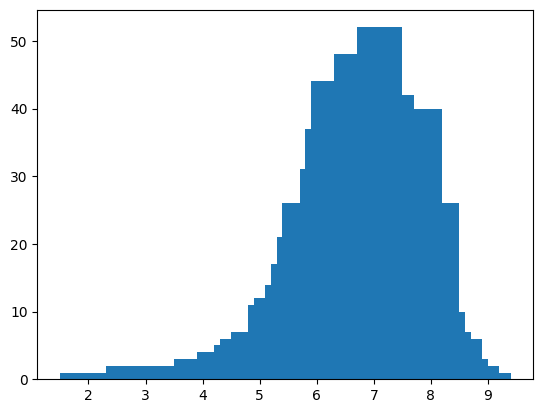

In [14]:
plt.bar(counts_df.rating, counts_df.frequency)

Lamentablemente nos hacen falta elementos visuales necesarios para comprender la gráfica: títulos, leyendas, etc.

> Pero todo esto lo aprenderemos más adelante

---

Veamos ahora la distribución de la variable Rating con un histograma. El argumento 10 indica que queremos 10 barras (cubetas o bins) en el histograma.

(array([  1.,   3.,   8.,  20.,  55., 154., 283., 281., 172.,  23.]),
 array([1.9 , 2.61, 3.32, 4.03, 4.74, 5.45, 6.16, 6.87, 7.58, 8.29, 9.  ]),
 <BarContainer object of 10 artists>)

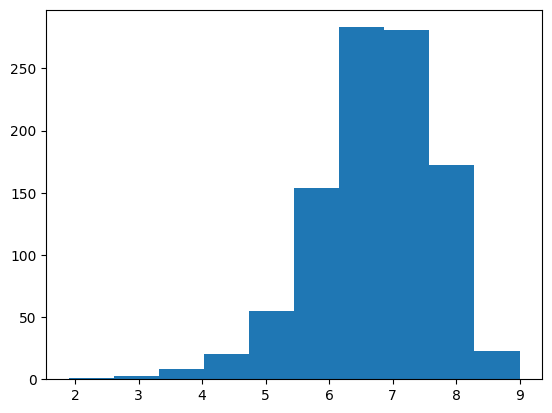

In [19]:
plt.hist(df.Rating,10)

In [22]:
len(df.Rating)

1000

Y ahora veamos Metscore con 20 cubetas

(array([ 1.,  0.,  0.,  0.,  1.,  1.,  0.,  4.,  1.,  0.,  1.,  0.,  3.,
         6.,  2.,  2.,  2.,  6.,  0.,  3.,  4.,  7., 10.,  7., 11., 14.,
        11.,  0., 11.,  9.,  8., 16., 13., 11., 17., 10.,  0., 14., 11.,
        16., 17., 21., 15., 14., 22.,  0., 15., 20., 12., 17., 20., 23.,
        20., 19.,  0., 19., 14., 16., 19., 24., 22., 25., 15.,  0., 25.,
        17., 10., 15., 25., 14., 17.,  8.,  0., 21., 13., 13., 16., 10.,
        21., 12., 13.,  0.,  9.,  9.,  7.,  4.,  8.,  3.,  5.,  1.,  0.,
         2.,  3.,  3.,  3.,  4.,  0.,  1.,  1.,  1.]),
 array([ 11.  ,  11.89,  12.78,  13.67,  14.56,  15.45,  16.34,  17.23,
         18.12,  19.01,  19.9 ,  20.79,  21.68,  22.57,  23.46,  24.35,
         25.24,  26.13,  27.02,  27.91,  28.8 ,  29.69,  30.58,  31.47,
         32.36,  33.25,  34.14,  35.03,  35.92,  36.81,  37.7 ,  38.59,
         39.48,  40.37,  41.26,  42.15,  43.04,  43.93,  44.82,  45.71,
         46.6 ,  47.49,  48.38,  49.27,  50.16,  51.05,  51.94,  52.83,
  

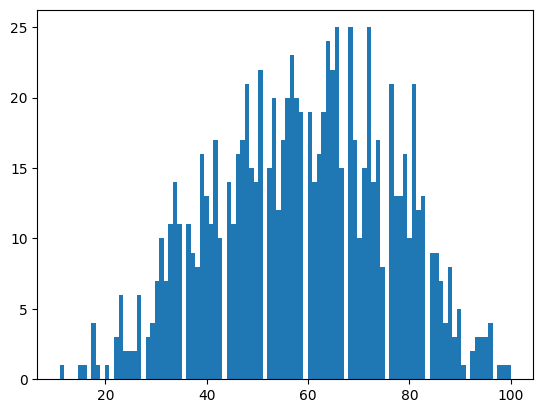

In [25]:
plt.hist(df.Metascore,100)

## Correlación

Otra tarea útil y necesaria es encontrar variables que estén correlacionadas entre sí. Para esto, construiremos una matriz de correlación, la cual nos pintará un mapa de calor con los valores de correlación.

Primero crearemos un dataframe que contendrá únicamente las variables numéricas, y a partir de este, crearemos la matriz de correlación utilizando el método `corr()`

Una forma fácil de crear un DataFrame a partir de otro es de la siguiente manera:

In [27]:
df[['Rank', 'Title']]

,Rank,Title
0,1,Guardians of the Galaxy
1,2,Prometheus
2,3,Split
3,4,Sing
4,5,Suicide Squad
...,...,...
995,996,Secret in Their Eyes
996,997,Hostel: Part II
997,998,Step Up 2: The Streets
998,999,Search Party


Esto nos dará un DataFrame subconjunto de `df` que contiene únicamente las columnas `Rank` y `Title`

Utilizando esta misma sintaxis, creemos `df_corr`

In [30]:
df_corr = df[['Year', 'Runtime_Minutes', 'Rating', 'Votes', 'Revenue_Millions', 'Metascore']].corr()
df_corr

,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore
Year,1.000000,-0.164900,-0.211219,-0.411904,-0.126790,-0.079305
Runtime_Minutes,-0.164900,1.000000,0.392214,0.407062,0.267953,0.211978
Rating,-0.211219,0.392214,1.000000,0.511537,0.217654,0.631897
Votes,-0.411904,0.407062,0.511537,1.000000,0.639661,0.325684
Revenue_Millions,-0.126790,0.267953,0.217654,0.639661,1.000000,0.142397
Metascore,-0.079305,0.211978,0.631897,0.325684,0.142397,1.000000


El método `.corr()` de Pandas se utiliza para calcular la matriz de correlación entre las columnas de un DataFrame. La correlación mide la relación entre dos variables, indicando qué tan fuerte o débil es la relación entre ellas. El valor resultante oscila entre -1 y 1:

* 1 indica una correlación positiva perfecta (cuando una variable aumenta, la otra también lo hace de manera proporcional).
* -1 indica una correlación negativa perfecta (cuando una variable aumenta, la otra disminuye de manera proporcional).
* 0 indica que no hay correlación lineal entre las variables. Este método es útil para identificar relaciones entre diferentes variables en un conjunto de datos, lo que puede ser crucial para el análisis exploratorio de datos y para seleccionar características en modelos predictivos.


---

Con este nuevo dataframe, podemos crear nuestro mapa de calor muy fácilmente:

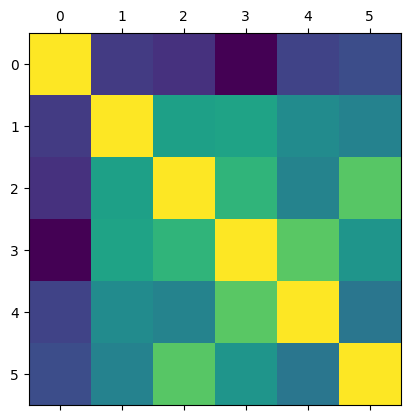

In [31]:
plt.matshow(df_corr)
plt.show()

¡Bien! Pero podemos mejorar un poco esta visualización. Para empezar, estaría bien saber qué significa cada color. Adicionalmente, en lugar de poner los índices numéricos de las variables, sería mejor poner los nombres de las variables.


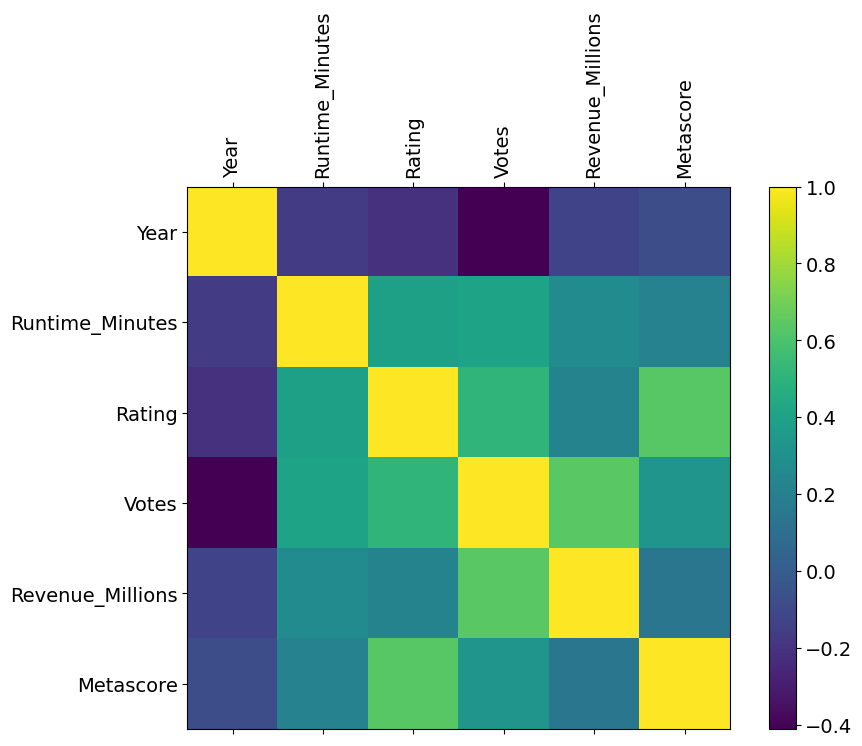

In [32]:
# Cambiar el tamaño de la figura
f = plt.figure(figsize=(10, 7))

# Mostrar la matriz de correlación
plt.matshow(df_corr, fignum=f.number)

# Añadir las etiquetas de las variables
plt.xticks(range(df_corr.shape[1]), df_corr.columns, fontsize=14, rotation=90)
plt.yticks(range(df_corr.shape[1]), df_corr.columns, fontsize=14)

# Añadir una leyenda de color
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

# Mostrar el gráfico
plt.show()

# Seaborn

Matplotlib es una librería muy flexible y nos permite hacer muchas cosas. Sin embargo, su uso, y sobre todo su personalización, puede ser un poco complicado. Por suerte, existe una librería que se construyó sobre `matplotlib` y que nos permite hacer visualizaciones más atractivas y con menos código. Esta librería se llama `seaborn`.

Seaborn ya viene instalado en este entorno virtual, pero si no lo tuvieran instalado, pueden hacerlo con el siguiente comando:

```bash
pip install seaborn
```

Y ahora importamos seaborn

In [33]:
import seaborn as sns

> Nota que importamos seaborn como `sns`. Esto es una convención que se sigue en la comunidad de Python y que nos permite escribir menos código.

---

Ya que tenemos seaborn, vamos a construir nuevamente la matriz de correlación, pero ahora con seaborn. Para esto, utilizaremos el método `heatmap()` de seaborn. Le mandamos dos argumentos:

* `data`: el dataframe que contiene las variables numéricas
* `annot`: si queremos que se muestren los valores de correlación en cada celda

<Axes: >

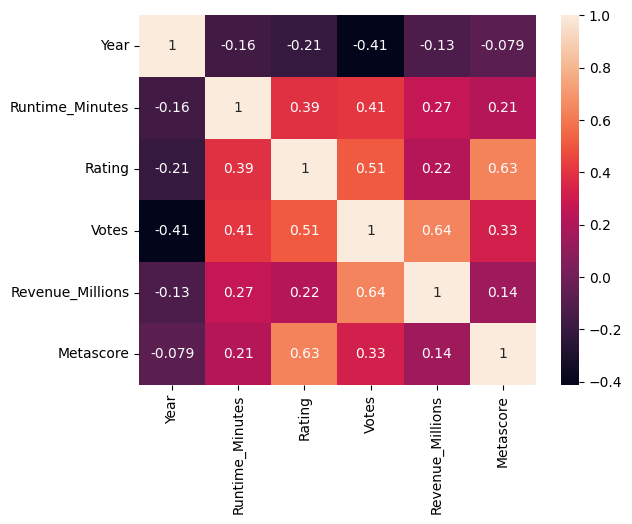

In [34]:
sns.heatmap(df_corr, annot=True)

Agreguemos un título a esta gráfica:

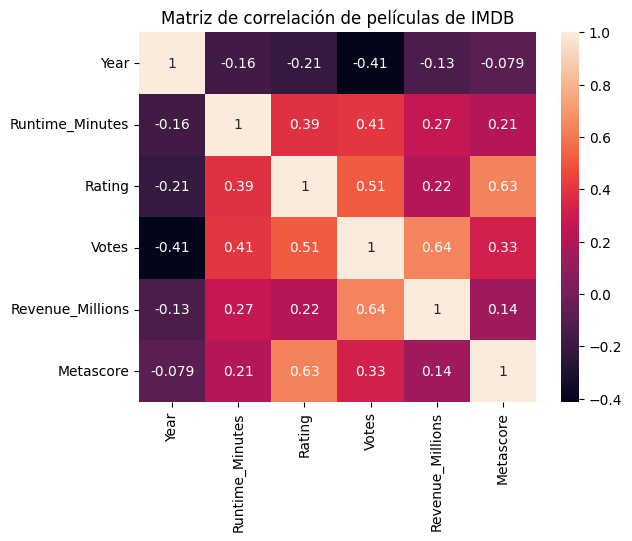

In [35]:
sns.heatmap(df_corr, annot=True)
plt.title("Matriz de correlación de películas de IMDB")
plt.show()

> Sigamos jugando con Seaborn


Cambiemos la paleta de colores a `coolwarm` utilizando el argumento `cmap`

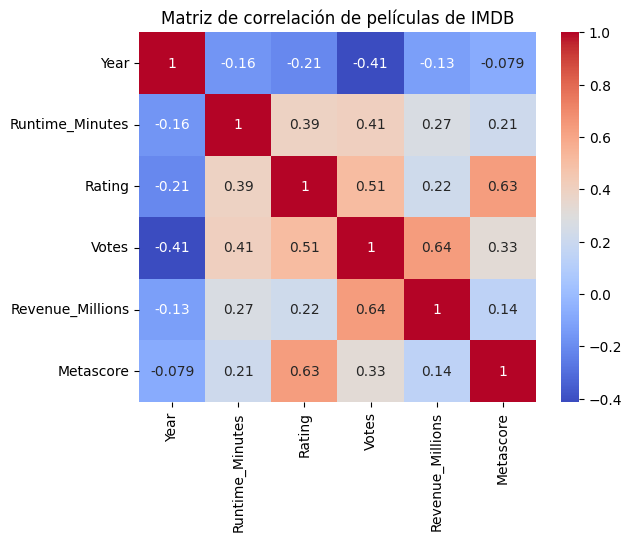

In [36]:
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación de películas de IMDB")
plt.show()

---

Ahora cambiemos la paleta de colores a `RdYlGn` utilizando el argumento `cmap`

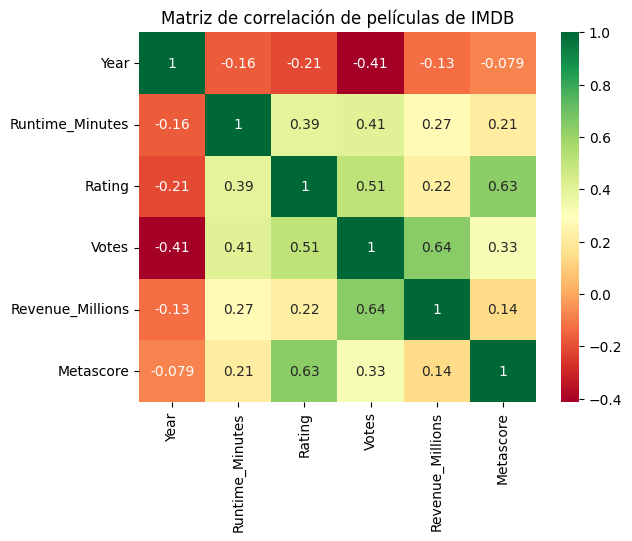

In [37]:
sns.heatmap(df_corr, annot=True, cmap='RdYlGn')
plt.title("Matriz de correlación de películas de IMDB")
plt.show()